In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_predict

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

In [13]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [14]:
df = pd.read_csv('data/00_MRT_2023_Prophet_weather2.csv', parse_dates=[0])

In [15]:
# Split the dataset to training and testing sets
train_len = math.floor((df.shape[0]*80)/100)
train = df[:train_len]
test = df[train_len:]

In [16]:
result = adfuller(train["Entry"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -7.012528879835397
p-value: 6.863133830821886e-10


C:\Users\Arcega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


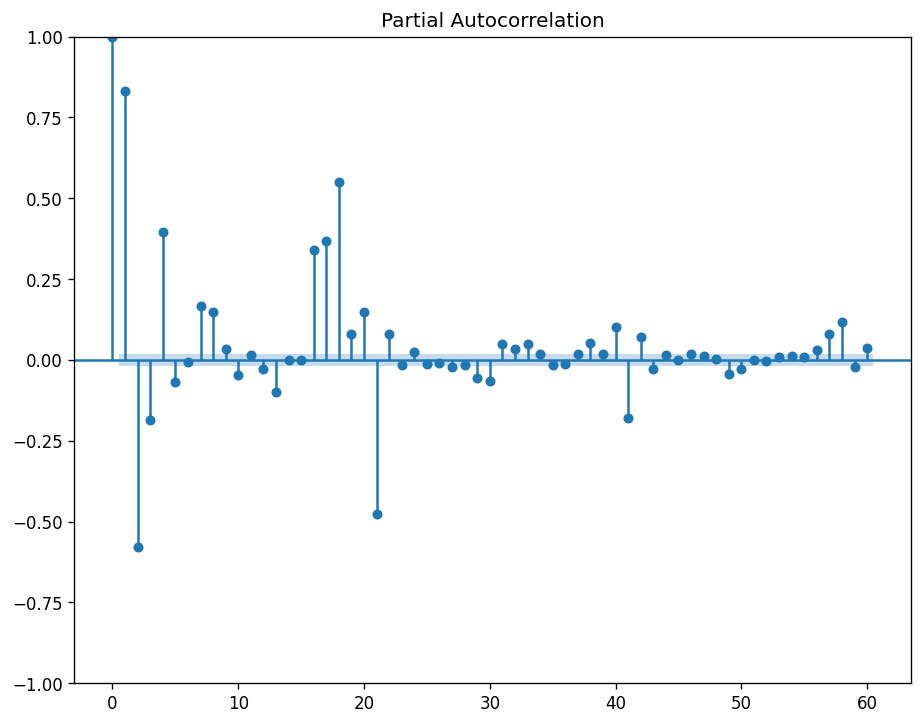

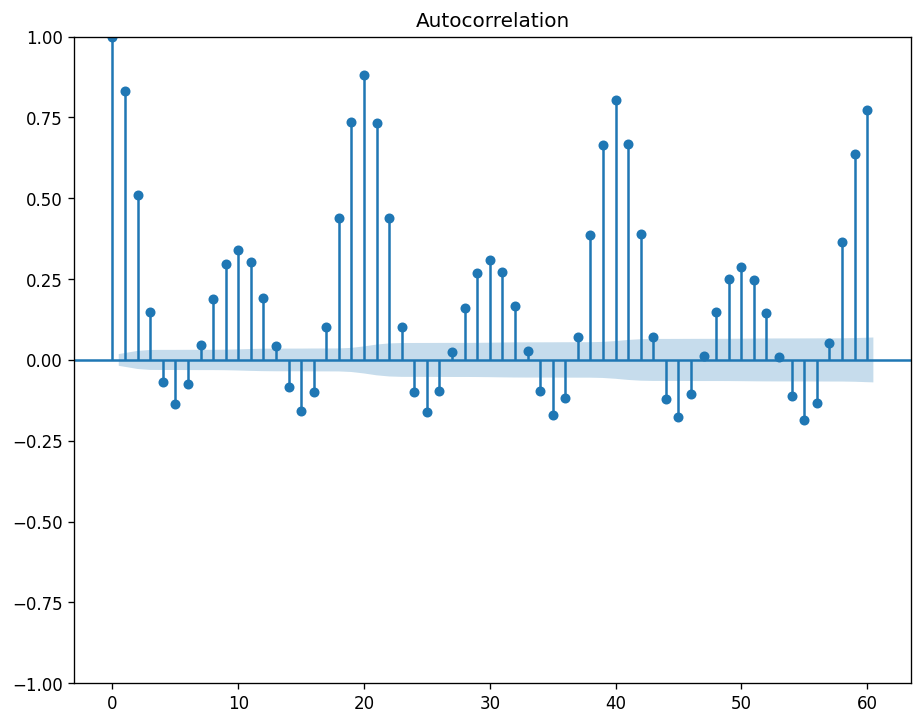

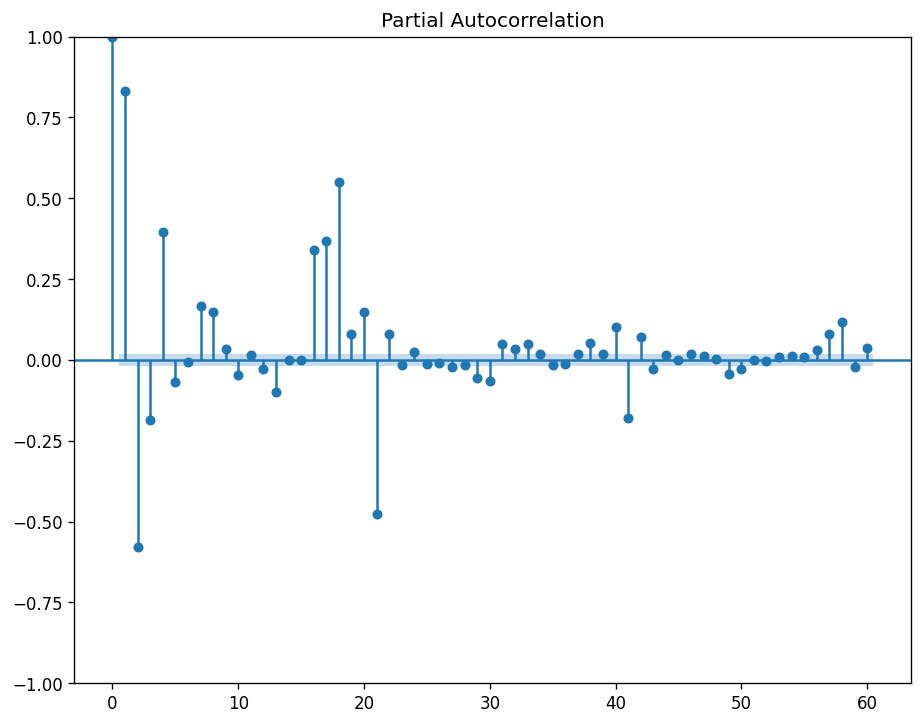

In [17]:
plot_acf(train["Entry"], lags=60)
plot_pacf(train["Entry"], lags=60)

C:\Users\Arcega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


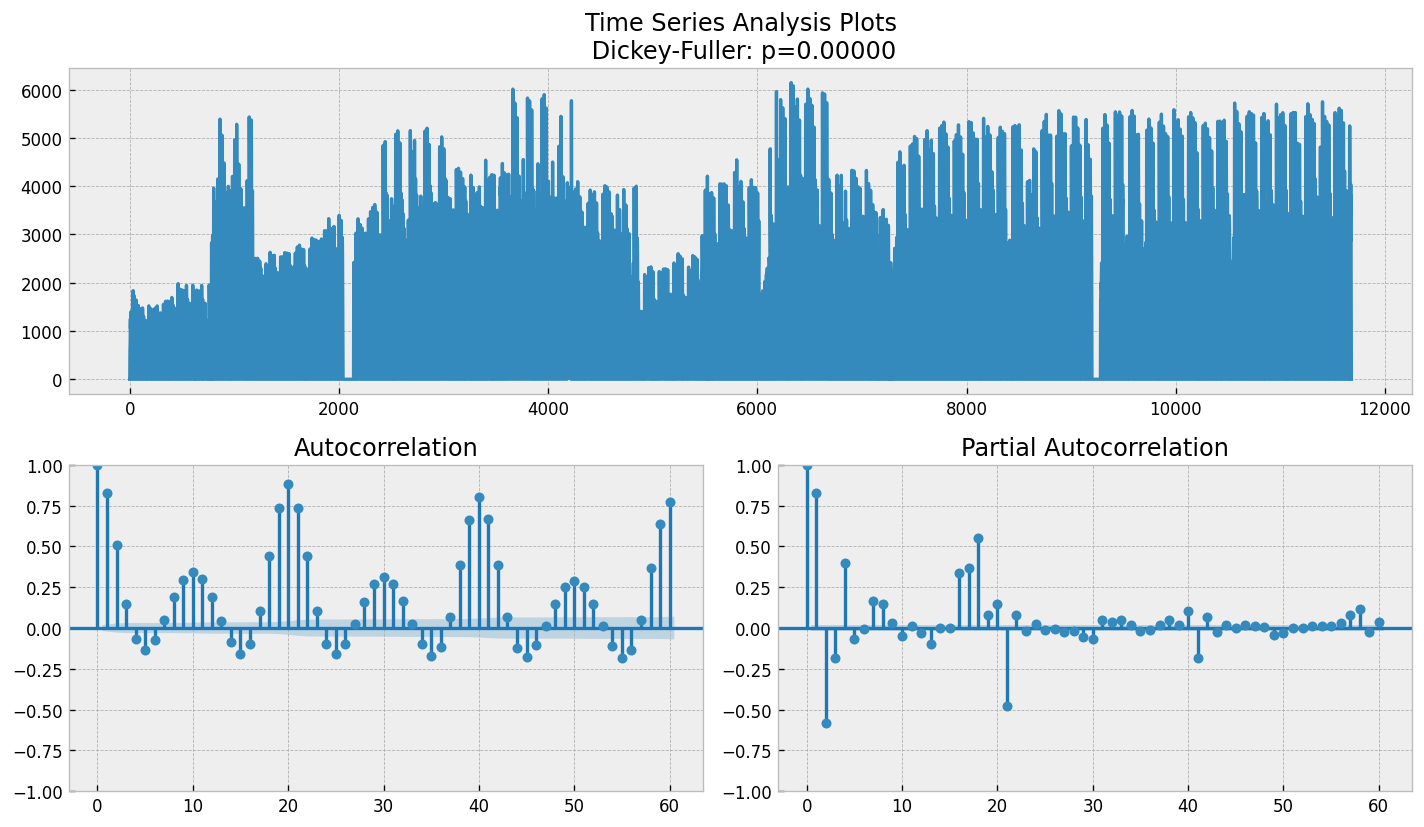

In [18]:
tsplot(train.Entry, lags=60)

C:\Users\Arcega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


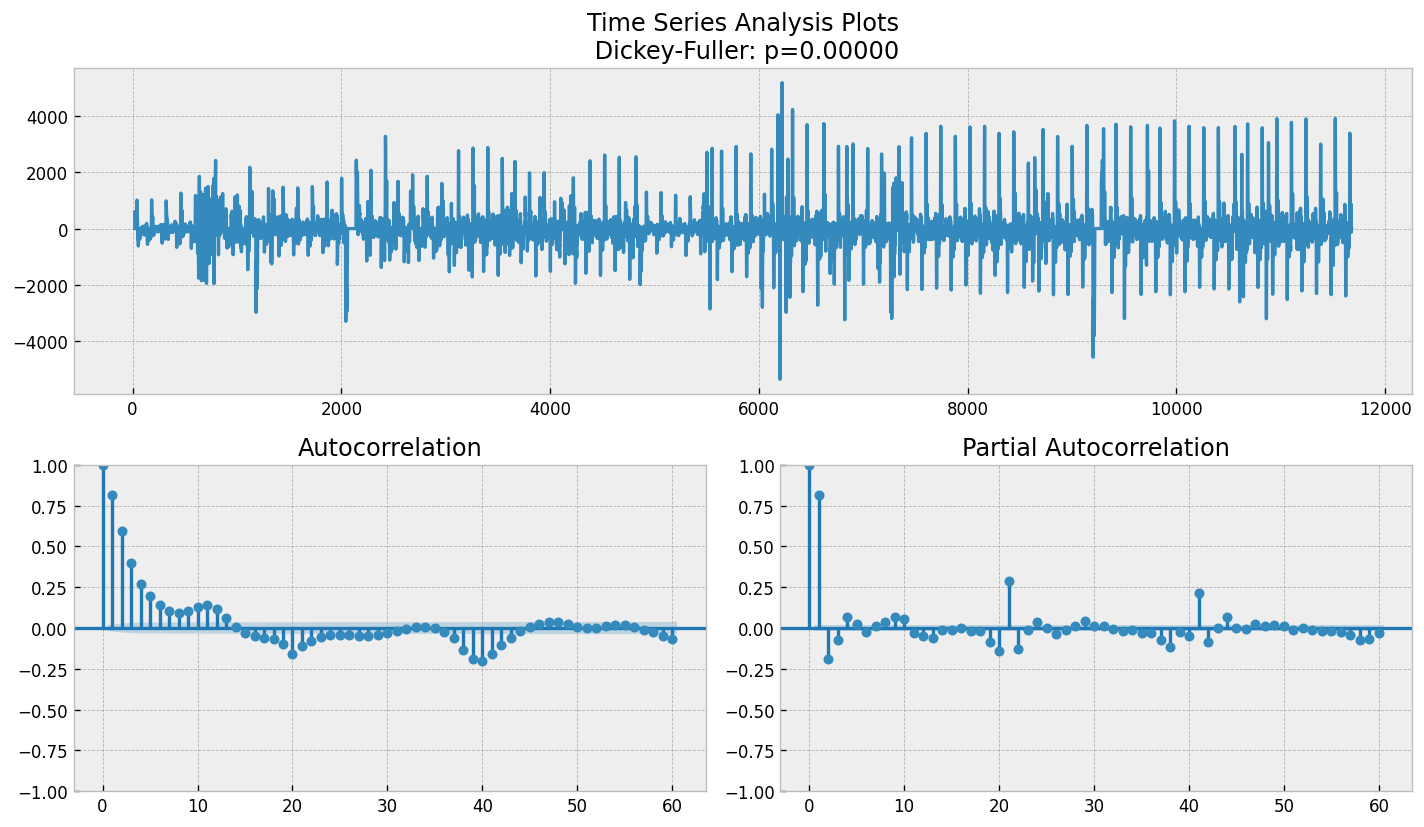

In [19]:
entry_diff = train.Entry - train.Entry.shift(20)
tsplot(entry_diff[20:], lags=60)

C:\Users\Arcega\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


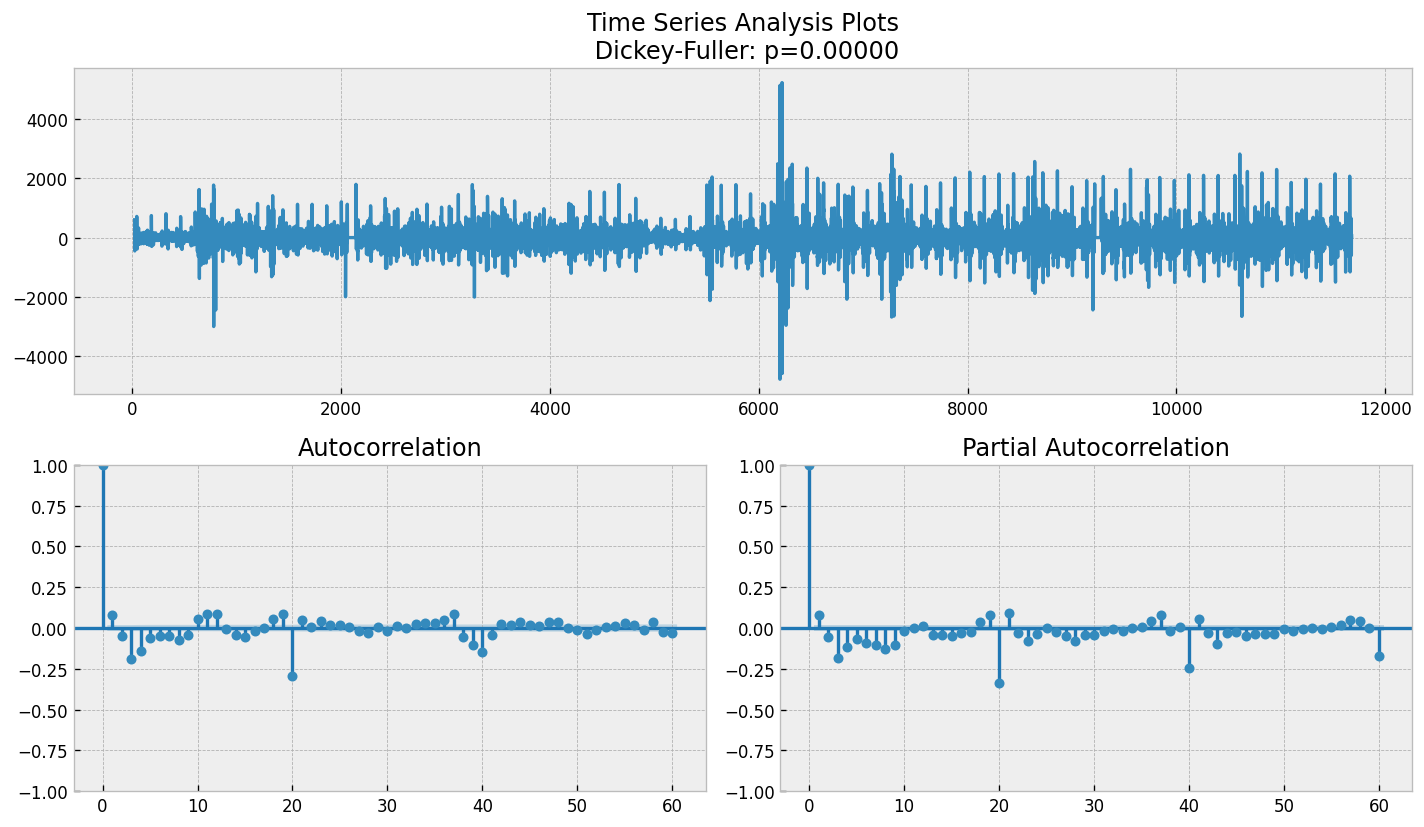

In [20]:
entry_diff = entry_diff - entry_diff.shift(1)
tsplot(entry_diff[20+1:], lags=60)

In [ ]:
# Fit the SARIMA model
# Initial SARIMA Model parameters
p, d, q = 1, 0, 1
P, D, Q, S =  3, 1, 1, 20
model = SARIMAX(train["Entry"], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()
model

                                     SARIMAX Results                                      
Dep. Variable:                              Entry   No. Observations:                14600
Model:             SARIMAX(1, 0, 1)x(3, 1, 1, 20)   Log Likelihood             -104020.062
Date:                            Mon, 14 Oct 2024   AIC                         208054.124
Time:                                    14:25:15   BIC                         208107.236
Sample:                                         0   HQIC                        208071.770
                                          - 14600                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7994      0.004    205.548      0.000       0.792       0.807
ma.L1          0.1952      0.005   

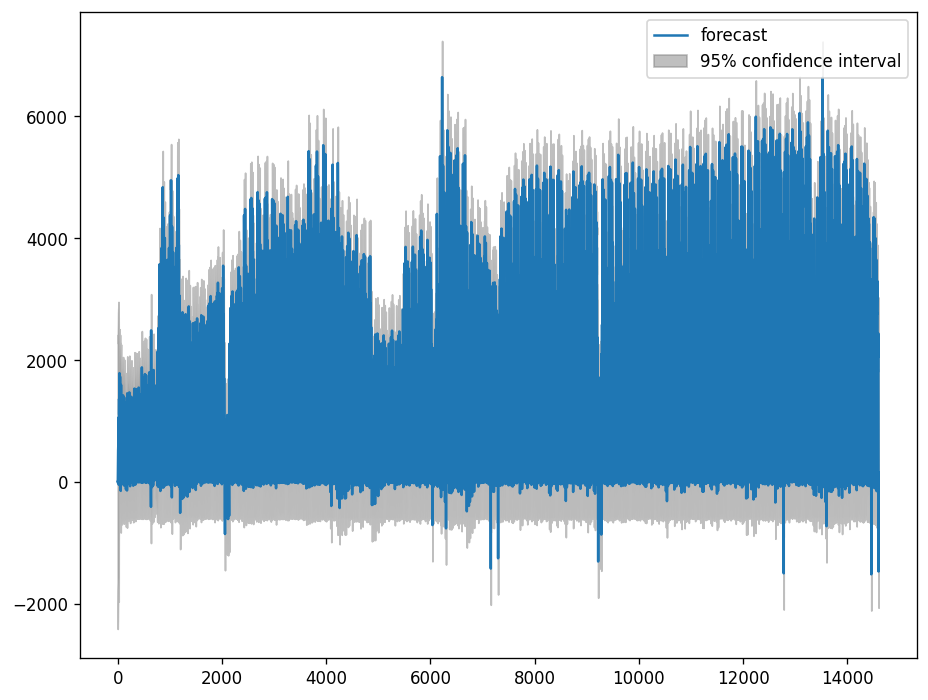

In [11]:
model_summary = model_fit.summary()
print(model_summary)
plot_predict(model_fit, dynamic=False)
plt.show()

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))

In [10]:
import numpy as np

# Assuming y is your time series
n = len(df['Entry'])  # Sample size
ci = 1.96 / np.sqrt(n)
print(f'95% Confidence Interval: ±{ci}')

95% Confidence Interval: ±0.01622107541660641
